<a href="https://colab.research.google.com/github/rvaidya2-ksu/IT7103/blob/main/IT7103_CourseProject_Group4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



* **IT 7103**
* **COURSE PROJECT**
* **GROUP 4**
* **Group Member: Sabrina Marcelin and Rajshree Vaidya**


**WEATHER CLASSIFICATION DATA**

---



***1. Loading the data using Pandas***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weather_classification_data.csv')
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
data.shape

(13200, 11)

In [ ]:
data.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


*This show there are no null value in our data. So, no imputation is required.*

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


***2. Splitting the data into 75% Training and 25% Testing.***

In [ ]:
from sklearn.model_selection import train_test_split

traindata, testdata = train_test_split(data, test_size=0.25) #test_size=0.25 means that 25% of data will be for testing, 75% for training
traindata.shape, testdata.shape

((9900, 11), (3300, 11))

***3. VISUALIZING NECESSARY COLUMNS IN THE DATA***

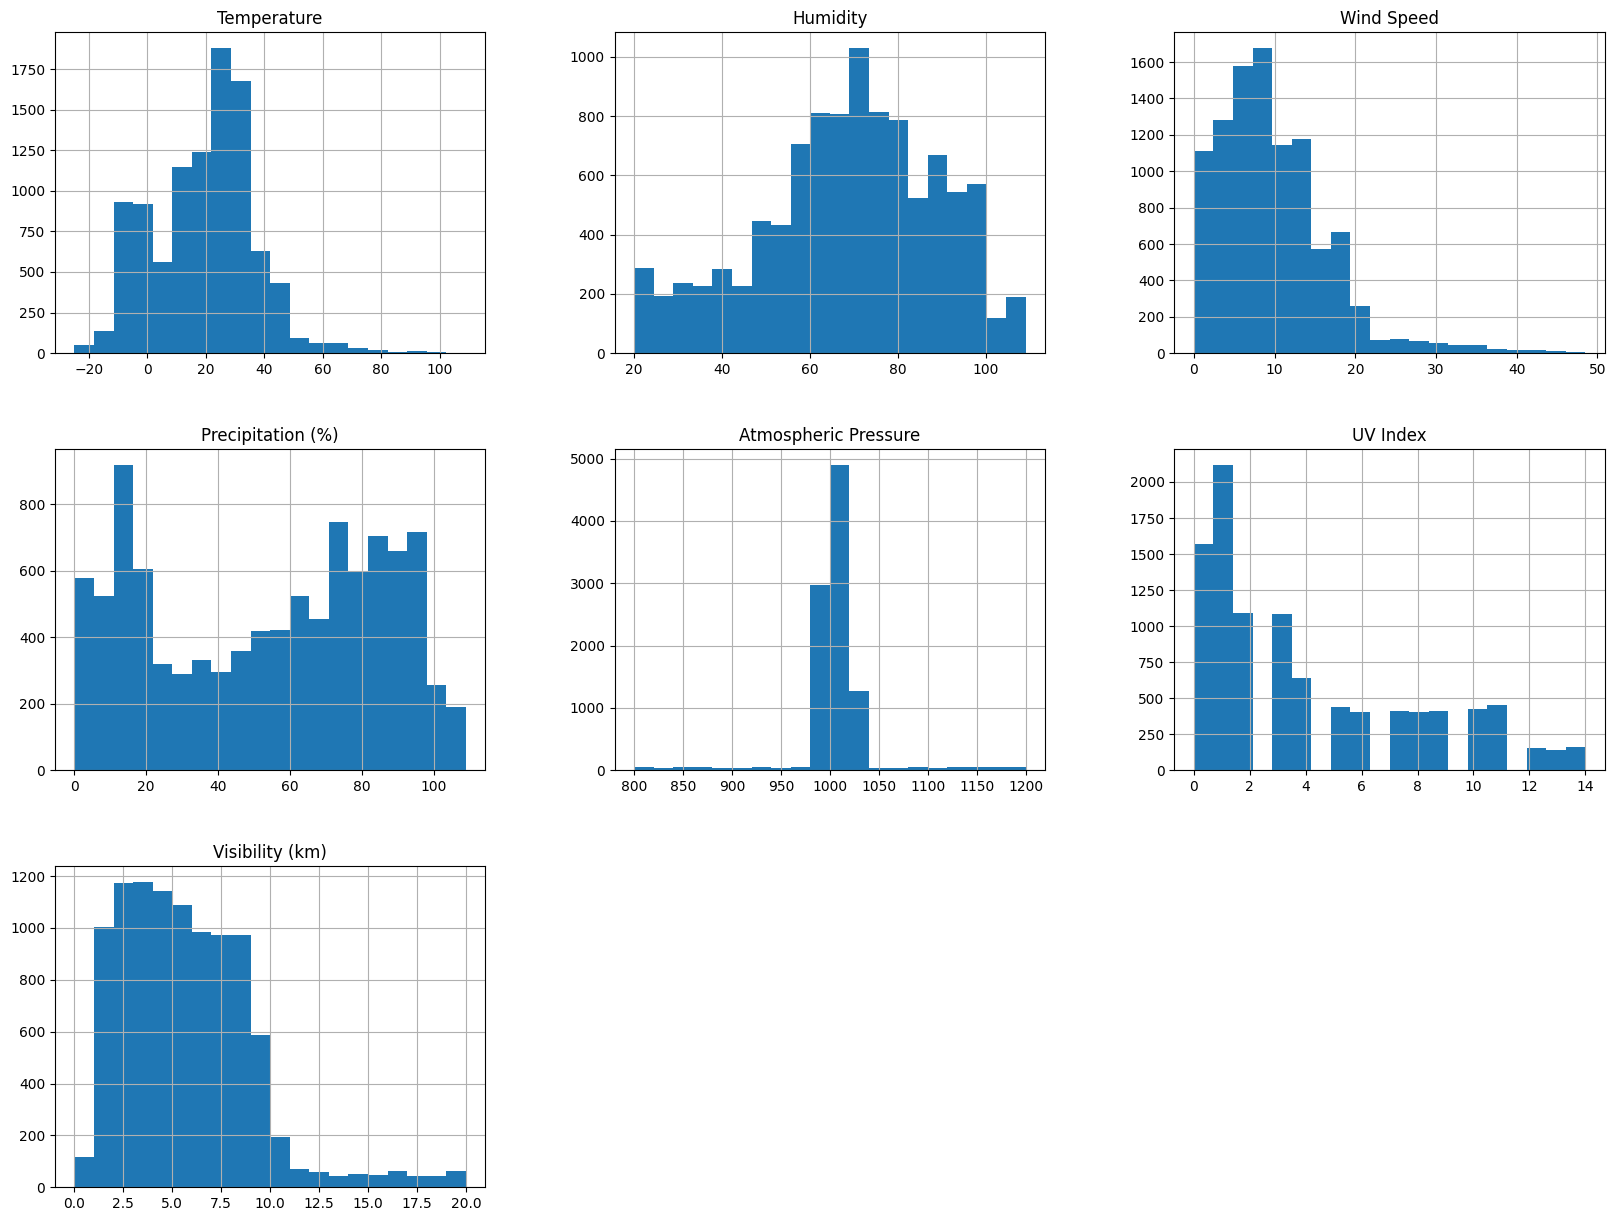

In [ ]:
from matplotlib import pyplot as plt

traindata.hist(bins=20, figsize=(20,15))
plt.show()

In [ ]:
num_cols = [column for column in data.columns if (traindata[column].dtypes == np.int64) or (traindata[column].dtypes == np.float64)]
num_cols

['Temperature',
 'Humidity',
 'Wind Speed',
 'Precipitation (%)',
 'Atmospheric Pressure',
 'UV Index',
 'Visibility (km)']

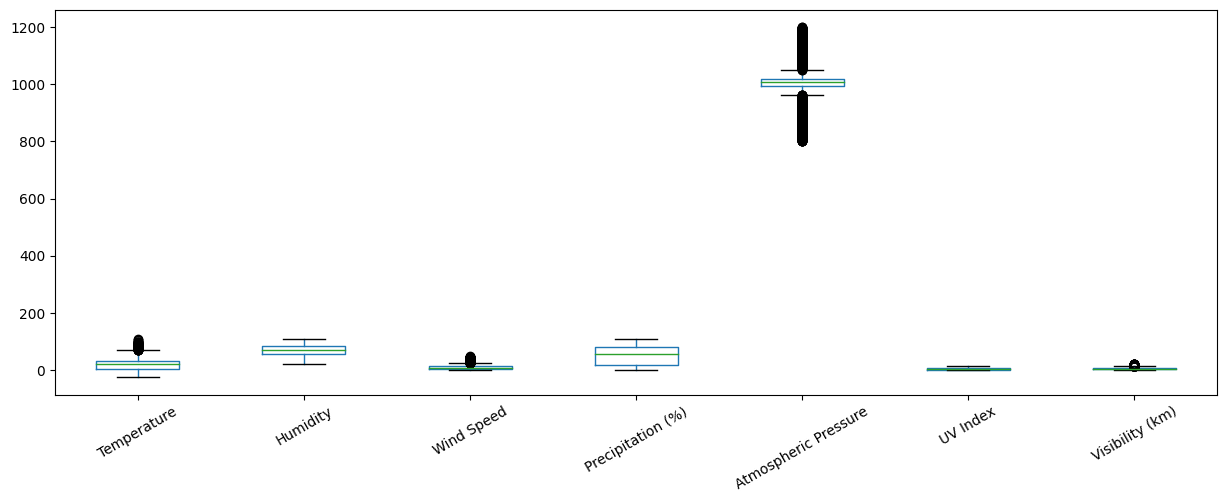

In [ ]:
traindata[num_cols].boxplot(grid=False, figsize=(15,5), rot=30)
plt.show()

In [ ]:
cat_cols = [column for column in traindata.columns if traindata[column].dtypes == object]
cat_cols

['Cloud Cover', 'Season', 'Location', 'Weather Type']

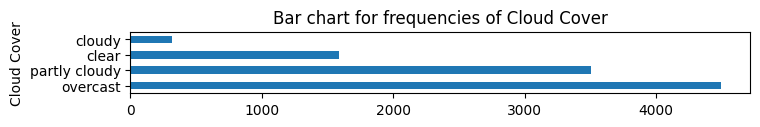

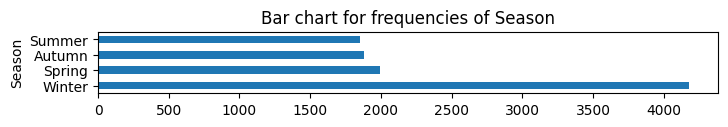

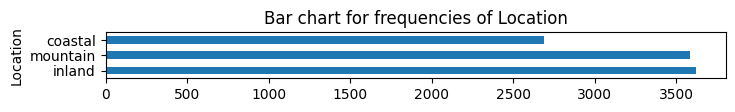

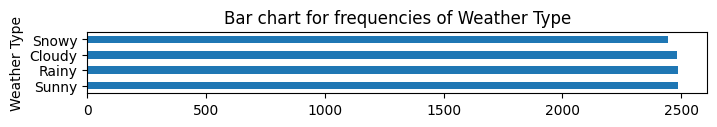

In [ ]:
for col in cat_cols:
    freq_table = traindata[col].value_counts()
    plt.figure(figsize = (8,len(freq_table)*0.2)) #a bit formatting so that chart look better
    freq_table.plot.barh(title='Bar chart for frequencies of ' + col)
    plt.show()
    print()

*Columns of the Dataset*

In [ ]:
num_cols = ['Temperature', 'Precipitation (%)', 'Atmospheric Pressure', 'Visibility (km)']
log_cols = ['Humidity', 'Wind Speed', 'UV Index']
cat_cols = ['Cloud Cover', 'Season', 'Location']
target = 'Weather Type'

***VISUALIZING FEATURES AFTER LOG TRANSFORMATION (LOG COLS)***

a. Humidity Feature

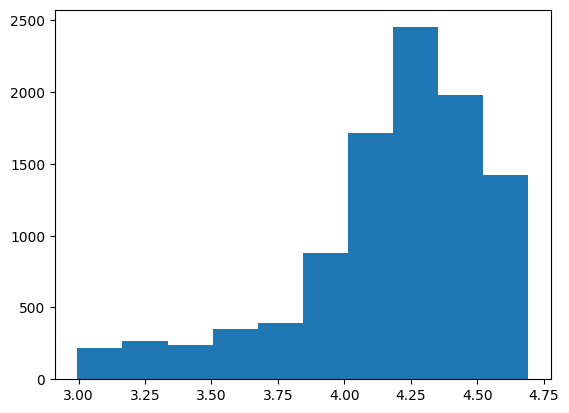

In [ ]:
log_Humidity = np.log(traindata['Humidity'])
plt.hist(log_Humidity)
plt.show()

b. Wind Speed

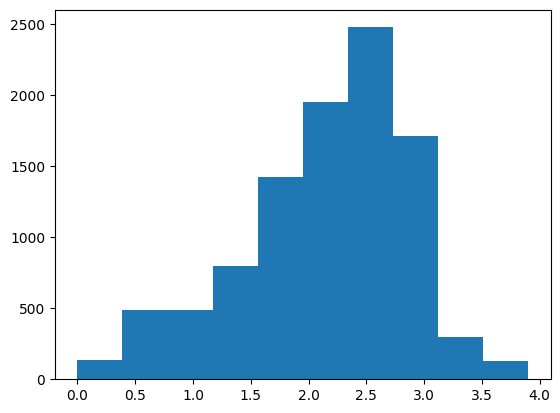

In [ ]:
log_WindS = np.log(traindata['Wind Speed'] + 1)     # to get rid of log(0), adding 1
plt.hist(log_WindS)

plt.show()

c. UV Index

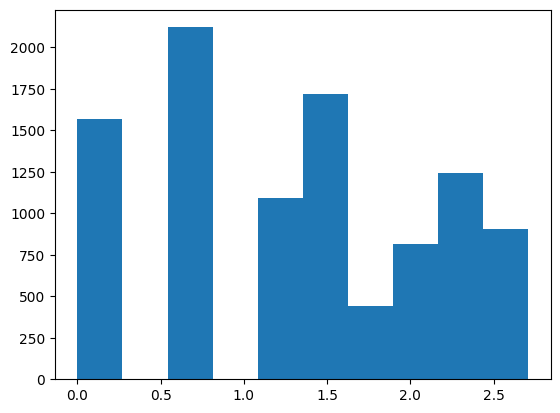

In [ ]:
log_UV = np.log(traindata['UV Index'] + 1)     # to get rid of log(0), adding 1
plt.hist(log_UV)
plt.show()

***4. PROCESSING PIPELINE***

In [ ]:
#processing pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

num_pipeline = Pipeline([                           #now we need a small pipeline for numeric columns since it has two steps
    #('impute', SimpleImputer(strategy='median')),   #this step will impute missing values using column medians
    ('standardize', StandardScaler())               #this step will scale all numeric columns
])

def log_transformation(x):
    return np.log(x+0.1)

log_pipeline = Pipeline([                                        #now we need a small pipeline for numeric columns since it has two steps
    #('impute', SimpleImputer(strategy='median')),                #this step will impute missing values using column medians
    ('log transform', FunctionTransformer(log_transformation)), #this include a log transformation into the pipeline
    ('standardize', StandardScaler())                            #this step will scale all numeric columns
])

processing_pipeline = ColumnTransformer([                                                      #this transformer merges the processed numeric columns and class columns
    ('numeric', num_pipeline, num_cols),                                                       #numeric columns
    ('log', log_pipeline, log_cols),                                                           #log columns
    ('class', OneHotEncoder(max_categories=5, handle_unknown='infrequent_if_exist'), cat_cols) #encoder to transform class columns to numeric, this will automatically handle missing data
  ])

In [ ]:
processing_pipeline

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('standardize',
                                                  StandardScaler())]),
                                 ['Temperature', 'Precipitation (%)',
                                  'Atmospheric Pressure', 'Visibility (km)']),
                                ('log',
                                 Pipeline(steps=[('log transform',
                                                  FunctionTransformer(func=<function log_transformation at 0x7b8e9638f6d0>)),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['Humidity', 'Wind Speed', 'UV Index']),
                                ('class',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                                               max_categories=5),
                                 ['Cloud Cover', 'Season', 'Location'])])

***5. DATA MODELLING***

***5.1 Training Decision Tree Model***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_pipeline = Pipeline([
    ('processing',processing_pipeline),
    ('modeling',DecisionTreeClassifier())
])

tree_pipeline.fit(traindata, traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['Temperature',
                                                   'Precipitation (%)',
                                                   'Atmospheric Pressure',
                                                   'Visibility (km)']),
                                                 ('log',
                                                  Pipeline(steps=[('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7b8e9638f6d0>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['Humidity', 'Wind Speed',
                                                   'UV Index']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['Cloud Cover', 'Season',
                                                   'Location'])])),
                ('modeling', DecisionTreeClassifier())])

***Evaluation of Data Performance by Confusion Metrics (Accuracy, Precision, Recall and F1 Score)***

Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
tree_pred = tree_pipeline.predict(traindata)
accuracy_score(traindata[target], tree_pred)

1.0

In [ ]:
tree_pred_test = tree_pipeline.predict(testdata)
accuracy_score(testdata[target], tree_pred_test)

0.8993939393939394

Precision Score

In [ ]:
from sklearn.metrics import precision_score
tree_pred = tree_pipeline.predict(traindata)
precision_score(traindata[target], tree_pred, average='weighted')

1.0

In [ ]:
tree_pred_test = tree_pipeline.predict(testdata)
precision_score(testdata[target], tree_pred_test, average='weighted')

0.8993583176751799

Recall Score

In [ ]:
from sklearn.metrics import recall_score
tree_pred = tree_pipeline.predict(traindata)
recall_score(traindata[target], tree_pred, average='weighted')

1.0

In [ ]:
tree_pred_test = tree_pipeline.predict(testdata)
recall_score(testdata[target], tree_pred_test, average='weighted')

0.8993939393939394

F1 Score

In [ ]:
from sklearn.metrics import f1_score
tree_pred = tree_pipeline.predict(traindata)
f1_score(traindata[target], tree_pred, average='weighted')

1.0

In [ ]:
tree_pred_test = tree_pipeline.predict(testdata)
f1_score(testdata[target], tree_pred_test, average='weighted')

0.8992522820342638

***FINE TUNING THE DECISION TREE MODEL***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'max_depth': [2, 3, 4, 5],
    'max_features' : [5, 10, 15, 20],
    'min_samples_split' : [25, 50, 100, 200],
    'min_samples_leaf' : [25, 50, 100, 200]
}]

tree = DecisionTreeClassifier()

grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy', return_train_score=True)

tree_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('modeling tree', grid_search)
])

tree_pipeline.fit(traindata, traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['Temperature',
                                                   'Precipitation (%)',
                                                   'Atmospheric Pressure',
                                                   'Visibility (km)']),
                                                 ('log',
                                                  Pipeline(steps=[('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7b8e9638f6d0>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['H...
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['Cloud Cover', 'Season',
                                                   'Location'])])),
                ('modeling tree',
                 GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                              param_grid=[{'max_depth': [2, 3, 4, 5],
                                           'max_features': [5, 10, 15, 20],
                                           'min_samples_leaf': [25, 50, 100,
                                                                200],
                                           'min_samples_split': [25, 50, 100,
                                                                 200]}],
                              return_train_score=True, scoring='accuracy'))])

***AFTER FINE TUNING, EVALUATING THE PERFORMANCE OF CONFUSION METRICS***

Accuracy Score

In [ ]:
tree_pred = tree_pipeline.predict(traindata)
accuracy_score(traindata[target], tree_pred)

0.9085858585858586

In [ ]:
tree_pred_test = tree_pipeline.predict(testdata)
accuracy_score(testdata[target], tree_pred_test)

0.9048484848484849

Precision Score

In [ ]:
tree_pred = tree_pipeline.predict(traindata)
precision_score(traindata[target], tree_pred, average='weighted')

0.9124592085639888

In [ ]:
tree_pred_test = tree_pipeline.predict(testdata)
precision_score(testdata[target], tree_pred_test, average='weighted')

0.9080561774208135

Recall Score

In [ ]:
tree_pred = tree_pipeline.predict(traindata)
recall_score(traindata[target], tree_pred, average='weighted')

0.9085858585858586

In [ ]:
tree_pred_test = tree_pipeline.predict(testdata)
recall_score(testdata[target], tree_pred_test, average='weighted')

0.9048484848484849

F1 Score

In [ ]:
tree_pred = tree_pipeline.predict(traindata)
f1_score(traindata[target], tree_pred, average='weighted')

0.9093797097699223

In [ ]:
tree_pred_test = tree_pipeline.predict(testdata)
f1_score(testdata[target], tree_pred_test, average='weighted')

0.905673169259464

***5.2 Training Random Forest Model***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_pipeline = Pipeline([
    ('processing',processing_pipeline),
    ('modeling',RandomForestClassifier(class_weight='balanced'))
])

forest_pipeline.fit(traindata, traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['Temperature',
                                                   'Precipitation (%)',
                                                   'Atmospheric Pressure',
                                                   'Visibility (km)']),
                                                 ('log',
                                                  Pipeline(steps=[('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7b8e9638f6d0>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['Humidity', 'Wind Speed',
                                                   'UV Index']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['Cloud Cover', 'Season',
                                                   'Location'])])),
                ('modeling', RandomForestClassifier(class_weight='balanced'))])

***Evaluation of Data Performance by Confusion Metrics (Accuracy, Precision, Recall and F1 Score)***

Accuracy Score

In [ ]:
forest_pred = forest_pipeline.predict(traindata)
accuracy_score(traindata[target], forest_pred)

1.0

In [ ]:
forest_pred_test = forest_pipeline.predict(testdata)
accuracy_score(testdata[target], forest_pred_test)

0.9136363636363637

Precision Score

In [ ]:
forest_pred = forest_pipeline.predict(traindata)
precision_score(traindata[target], forest_pred, average='weighted')

1.0

In [ ]:
forest_pred = forest_pipeline.predict(testdata)
precision_score(testdata[target], forest_pred, average='weighted')

0.9140326296883865

Recall Score

In [ ]:
forest_pred = forest_pipeline.predict(traindata)
recall_score(traindata[target], forest_pred, average='weighted')

1.0

In [ ]:
forest_pred = forest_pipeline.predict(testdata)
recall_score(testdata[target], forest_pred, average='weighted')

0.9136363636363637

F1 Score

In [ ]:
forest_pred = forest_pipeline.predict(traindata)
f1_score(traindata[target], forest_pred, average='weighted')

1.0

In [ ]:
forest_pred_test = forest_pipeline.predict(testdata)
f1_score(testdata[target], forest_pred_test, average='weighted')

0.9137337815014716

***FINE TUNING THE RANDOM FOREST MODEL***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'max_depth': [2, 3, 4, 5],
    'max_features' : [5, 10, 15, 20],
    'min_samples_split' : [25, 50, 100, 200],
    'min_samples_leaf' : [25, 50, 100, 200],
    'n_estimators': [5, 10, 20, 50]
}]

forest = RandomForestClassifier()

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='accuracy', return_train_score=True)

forest_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('modeling forest', grid_search)
])

forest_pipeline.fit(traindata, traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['Temperature',
                                                   'Precipitation (%)',
                                                   'Atmospheric Pressure',
                                                   'Visibility (km)']),
                                                 ('log',
                                                  Pipeline(steps=[('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7b8e9638f6d0>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['H...
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['Cloud Cover', 'Season',
                                                   'Location'])])),
                ('modeling forest',
                 GridSearchCV(cv=5, estimator=RandomForestClassifier(),
                              param_grid=[{'max_depth': [2, 3, 4, 5],
                                           'max_features': [5, 10, 15, 20],
                                           'min_samples_leaf': [25, 50, 100,
                                                                200],
                                           'min_samples_split': [25, 50, 100,
                                                                 200],
                                           'n_estimators': [5, 10, 20, 50]}],
                              return_train_score=True, scoring='accuracy'))])

***AFTER FINE TUNING, EVALUATING THE PERFORMANCE OF CONFUSION METRICS***

Accuracy Score

In [ ]:
forest_pred = forest_pipeline.predict(traindata)
accuracy_score(traindata[target], forest_pred)

0.9114141414141415

In [ ]:
forest_pred_test = forest_pipeline.predict(testdata)
accuracy_score(testdata[target], forest_pred_test)

0.91

Precision Score

In [ ]:
forest_pred = forest_pipeline.predict(traindata)
precision_score(traindata[target], forest_pred, average='weighted')

0.9125991314948049

In [ ]:
forest_pred_test = forest_pipeline.predict(testdata)
precision_score(testdata[target], forest_pred_test, average='weighted')

0.9108757131975902

Recall Score

In [ ]:
forest_pred = forest_pipeline.predict(traindata)
recall_score(traindata[target], forest_pred, average='weighted')

0.9114141414141415

In [ ]:
forest_pred_test = forest_pipeline.predict(testdata)
recall_score(testdata[target], forest_pred_test, average='weighted')

0.91

F1 Score

In [ ]:
forest_pred = forest_pipeline.predict(traindata)
f1_score(traindata[target], forest_pred, average='weighted')

0.911648759667083

In [ ]:
forest_pred_test = forest_pipeline.predict(testdata)
f1_score(testdata[target], forest_pred_test, average='weighted')

0.9100341300748992

***5.3 Training Logistic Regression Model***

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_pipeline = Pipeline([
    ('processing',processing_pipeline),
    ('modeling',LogisticRegression(max_iter=1000))
])


logistic_pipeline.fit(traindata, traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['Temperature',
                                                   'Precipitation (%)',
                                                   'Atmospheric Pressure',
                                                   'Visibility (km)']),
                                                 ('log',
                                                  Pipeline(steps=[('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7b8e9638f6d0>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['Humidity', 'Wind Speed',
                                                   'UV Index']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['Cloud Cover', 'Season',
                                                   'Location'])])),
                ('modeling', LogisticRegression(max_iter=1000))])

***Evaluation of Data Performance by Confusion Metrics (Accuracy, Precision, Recall and F1 Score)***

Accuracy Score

In [ ]:

logistic_pred = logistic_pipeline.predict(traindata)
accuracy_score(traindata[target], logistic_pred)

0.8671717171717171

In [ ]:
logistic_pred_test = logistic_pipeline.predict(testdata)
accuracy_score(testdata[target], logistic_pred_test)

0.8745454545454545

Precision Score

In [ ]:
logistic_pred = logistic_pipeline.predict(traindata)
precision_score(traindata[target], logistic_pred, average='weighted')

0.8683786062985235

In [ ]:
logistic_pred_test = logistic_pipeline.predict(testdata)
precision_score(testdata[target], logistic_pred_test, average='weighted')

0.8761454732189993

Recall Score

In [ ]:
logistic_pred = logistic_pipeline.predict(traindata)
recall_score(traindata[target], logistic_pred, average='weighted')

0.8671717171717171

In [ ]:
logistic_pred_test = logistic_pipeline.predict(testdata)
recall_score(testdata[target], logistic_pred_test, average='weighted')

0.8745454545454545

F1 Score

In [ ]:
logistic_pred = logistic_pipeline.predict(traindata)
f1_score(traindata[target], logistic_pred, average='weighted')

0.8673559865501905

In [ ]:
logistic_pred_test = logistic_pipeline.predict(testdata)
f1_score(testdata[target], logistic_pred_test,average='weighted')

0.8746410735375398

***FINE TUNING THE LOGISTIC REGRESSION MODEL***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic = LogisticRegression(max_iter=10000)
param_grid = [{'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy', return_train_score=True)

logistic_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('modeling', grid_search)
])

logistic_pipeline.fit(traindata, traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['Temperature',
                                                   'Precipitation (%)',
                                                   'Atmospheric Pressure',
                                                   'Visibility (km)']),
                                                 ('log',
                                                  Pipeline(steps=[('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7b8e9638f6d0>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['Humidity', 'Wind Speed',
                                                   'UV Index']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['Cloud Cover', 'Season',
                                                   'Location'])])),
                ('modeling',
                 GridSearchCV(cv=5,
                              estimator=LogisticRegression(max_iter=10000),
                              param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10,
                                                 100]}],
                              return_train_score=True, scoring='accuracy'))])

***AFTER FINE TUNING, EVALUATING THE PERFORMANCE OF CONFUSION METRICS***

Accuracy Score

In [ ]:
logistic_pred = logistic_pipeline.predict(traindata)
accuracy_score(traindata[target], logistic_pred)

0.8690909090909091

In [ ]:
logistic_pred_test = logistic_pipeline.predict(testdata)
accuracy_score(testdata[target], logistic_pred_test)

0.8751515151515151

Precision Score

In [ ]:
logistic_pred = logistic_pipeline.predict(traindata)
precision_score(traindata[target], logistic_pred, average='weighted')

0.8700737463764063

In [ ]:
logistic_pred_test = logistic_pipeline.predict(testdata)
precision_score(testdata[target], logistic_pred_test, average='weighted')

0.8765061208752537

Recall Score

In [ ]:
logistic_pred = logistic_pipeline.predict(traindata)
recall_score(traindata[target], logistic_pred, average='weighted')

0.8690909090909091

In [ ]:
logistic_pred_test = logistic_pipeline.predict(testdata)
recall_score(testdata[target], logistic_pred_test, average='weighted')

0.8751515151515151

F1 Score

In [ ]:
logistic_pred = logistic_pipeline.predict(traindata)
f1_score(traindata[target], logistic_pred, average='weighted')

0.8692296946057371

In [ ]:
logistic_pred_test = logistic_pipeline.predict(testdata)
f1_score(testdata[target], logistic_pred_test, average='weighted')

0.8751794523307347

***5.4 Training the Gradient Boosting Model***

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_pipeline = Pipeline([
    ('processing',processing_pipeline),
    ('modeling',GradientBoostingClassifier(n_estimators=300,
                                learning_rate=0.05,
                                random_state=100,
                                max_features=5 ))
])


gbc_pipeline.fit(traindata, traindata[target])

#gbc = GradientBoostingClassifier(n_estimators=300,
                               # learning_rate=0.05,
                               #  random_state=100,
                               #  max_features=5 )'''

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['Temperature',
                                                   'Precipitation (%)',
                                                   'Atmospheric Pressure',
                                                   'Visibility (km)']),
                                                 ('log',
                                                  Pipeline(steps=[('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7b8e9638f6d0>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['Humidity', 'Wind Speed',
                                                   'UV Index']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['Cloud Cover', 'Season',
                                                   'Location'])])),
                ('modeling',
                 GradientBoostingClassifier(learning_rate=0.05, max_features=5,
                                            n_estimators=300,
                                            random_state=100))])

***Evaluation of Data Performance by Confusion Metrics (Accuracy, Precision, Recall and F1 Score)***

Accuracy Score

In [ ]:
gbc_pred = gbc_pipeline.predict(traindata)
accuracy_score(traindata[target], gbc_pred)

0.9536363636363636

In [ ]:
gbc_pred_test = gbc_pipeline.predict(testdata)
accuracy_score(testdata[target], gbc_pred_test)

0.9136363636363637

Precision Score

In [ ]:
gbc_pred = gbc_pipeline.predict(traindata)
precision_score(traindata[target], gbc_pred, average ='weighted')

0.9537690746454224

In [ ]:
gbc_pred_test = gbc_pipeline.predict(testdata)
precision_score(testdata[target], gbc_pred_test, average ='weighted')

0.914161958371797

Recall Score

In [ ]:
gbc_pred = gbc_pipeline.predict(traindata)
recall_score(traindata[target], gbc_pred, average ='weighted')

0.9536363636363636

In [ ]:
gbc_pred_test = gbc_pipeline.predict(testdata)
recall_score(testdata[target], gbc_pred_test, average ='weighted')

0.9136363636363637

F1 Score

In [ ]:
gbc_pred = gbc_pipeline.predict(traindata)
f1_score(traindata[target], gbc_pred, average ='weighted')

0.9536554231811952

In [ ]:
gbc_pred_test = gbc_pipeline.predict(testdata)
f1_score(testdata[target], gbc_pred_test, average ='weighted')

0.9135703697496546

***FINE TUNING THE GRADIENT BOOSTING MODEL***

In [ ]:

from sklearn.model_selection import GridSearchCV

gbc = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='accuracy', return_train_score=True)

gbc_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('modeling', grid_search)
])

gbc_pipeline.fit(traindata, traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['Temperature',
                                                   'Precipitation (%)',
                                                   'Atmospheric Pressure',
                                                   'Visibility (km)']),
                                                 ('log',
                                                  Pipeline(steps=[('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7b8e9638f6d0>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['H...', 'Wind Speed',
                                                   'UV Index']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['Cloud Cover', 'Season',
                                                   'Location'])])),
                ('modeling',
                 GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                              param_grid={'learning_rate': [0.01, 0.1, 0.2],
                                          'max_depth': [3, 5, 7],
                                          'n_estimators': [50, 100, 200]},
                              return_train_score=True, scoring='accuracy'))])

***AFTER FINE TUNING, EVALUATING THE PERFORMANCE OF CONFUSION METRICS***

Accuracy Score

In [ ]:
gbc_pred = gbc_pipeline.predict(traindata)
accuracy_score(traindata[target], gbc_pred)

0.9621212121212122

In [ ]:
gbc_pred_test = gbc_pipeline.predict(testdata)
accuracy_score(testdata[target], gbc_pred_test)

0.916060606060606

Precision Score

In [ ]:
gbc_pred = gbc_pipeline.predict(traindata)
precision_score(traindata[target], gbc_pred, average ='weighted')

0.9625048867981588

In [ ]:
gbc_pred_test = gbc_pipeline.predict(testdata)
precision_score(testdata[target], gbc_pred_test, average ='weighted')

0.9165996644669959

Recall Score

In [ ]:
gbc_pred = gbc_pipeline.predict(traindata)
recall_score(traindata[target], gbc_pred, average ='weighted')

0.9621212121212122

In [ ]:
gbc_pred_test = gbc_pipeline.predict(testdata)
recall_score(testdata[target], gbc_pred_test, average ='weighted')

0.916060606060606

F1 Score

In [ ]:
gbc_pred = gbc_pipeline.predict(traindata)
f1_score(traindata[target], gbc_pred, average ='weighted')

0.9621885091954373

In [ ]:
gbc_pred_test = gbc_pipeline.predict(testdata)
f1_score(testdata[target], gbc_pred_test, average ='weighted')

0.9161581210682411

After fine tuning the models results on testdata are as follows:


1.   Decision Tree Model
      *   **Accuracy**: 0.904
      *   **Precision**: 0.908
      *   **Recall**: 0.904
      *   **F1**: 0.905


2.   Random Forest Model
      *   **Accuracy**: 0.91
      *   **Precision**: 0.910
      *   **Recall**: 0.91
      *   **F1**: 0.910


3.   Logistic Regression Model
      *   **Accuracy**: 0.875
      *   **Precision**: 0876
      *   **Recall**: 0.875
      *   **F1**: 0.876

4.   Gradient Boosting Model
      *   **Accuracy**: 0.916
      *   **Precision**: 0.916
      *   **Recall**: 0.916
      *   **F1**: 0.916
